In [1]:
# install.packages("iml")
# install.packages("randomForest")
# install.packages("partykit")
# install.packages("patchwork")

library(iml)
library(randomForest)
library(partykit)
library(patchwork)


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm



In [2]:
carros <- read.csv("../data/carros.csv", sep = ";", encoding = "UTF-8")

head(carros)


,Consumo,Cilindros,Cilindradas,RelEixoTraseiro,Peso,Tempo,TipoMotor,Transmissao,Marchas,Carburadors,HP
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,21,6,160,39,262,1646,0,1,4,4,110
2,21,6,160,39,2875,1702,0,1,4,4,110
3,228,4,108,385,232,1861,1,1,4,1,93
4,214,6,258,308,3215,1944,1,0,3,1,110
5,187,8,360,315,344,1702,0,0,3,2,175
6,181,6,225,276,346,2022,1,0,3,1,105


In [3]:
modelo <- randomForest(HP ~ ., data = carros, ntree = 1000)

# carros[, -11] é o dataset sem a variável HP
previsor <- Predictor$new(modelo, carros[, -11], y = carros$HP)


In [4]:
importancia <- FeatureImp$new(previsor, loss = "mse")

importancia$results


feature,importance.05,importance,importance.95,permutation.error
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Cilindros,4.922010,5.646972,6.443171,1636.1711
TipoMotor,2.070539,2.582521,3.254794,748.2677
Carburadors,1.922343,2.459579,2.663903,712.6461
Consumo,2.349871,2.425694,2.983441,702.8281
RelEixoTraseiro,1.600322,1.648925,2.019029,477.7647
Cilindradas,1.300901,1.388472,1.409716,402.3001
Tempo,1.284130,1.385153,1.520604,401.3384
Marchas,1.218818,1.332105,1.361844,385.9683
Peso,1.129387,1.160887,1.227271,336.3590


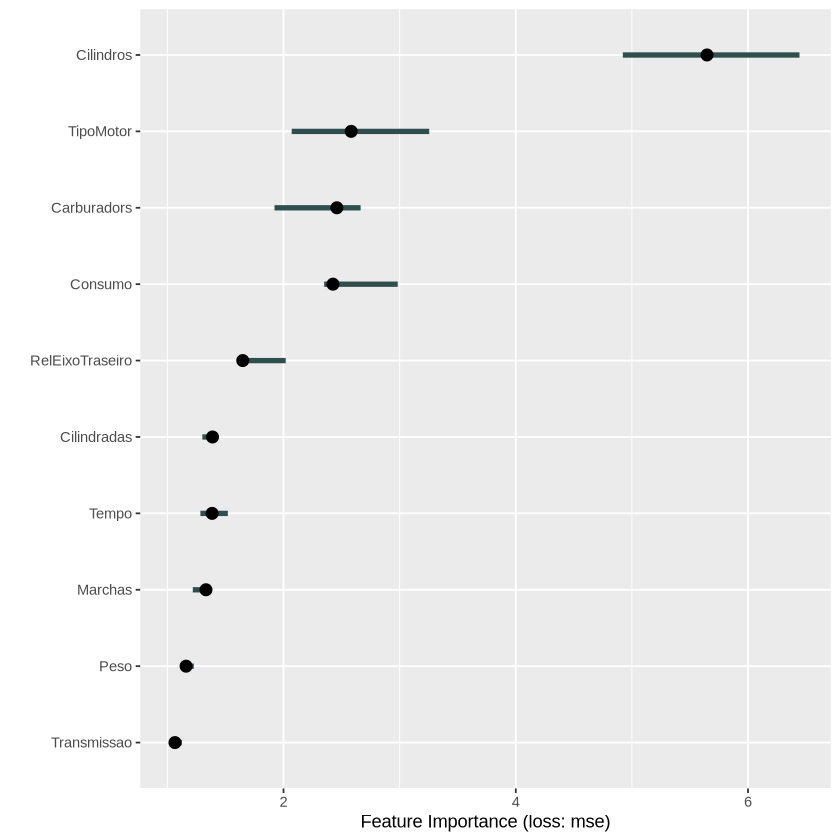

In [5]:
importancia$plot(type = "bar", order = TRUE)


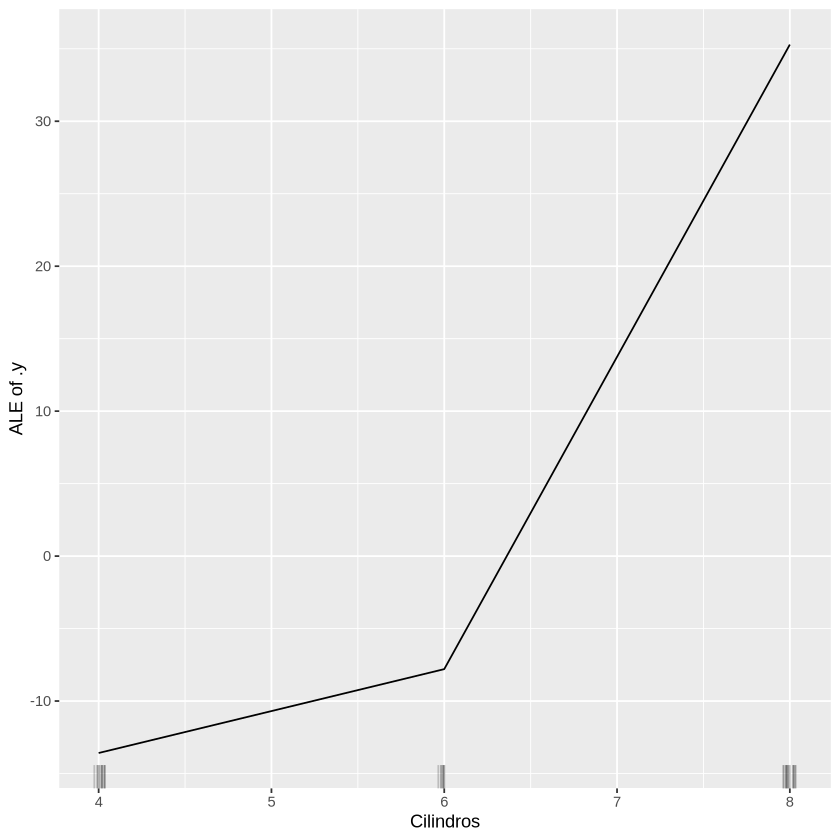

In [6]:
# Accumutated Local Effects
ALE <- FeatureEffect$new(previsor, feature = "Cilindros", method = "ale")

ALE$plot()


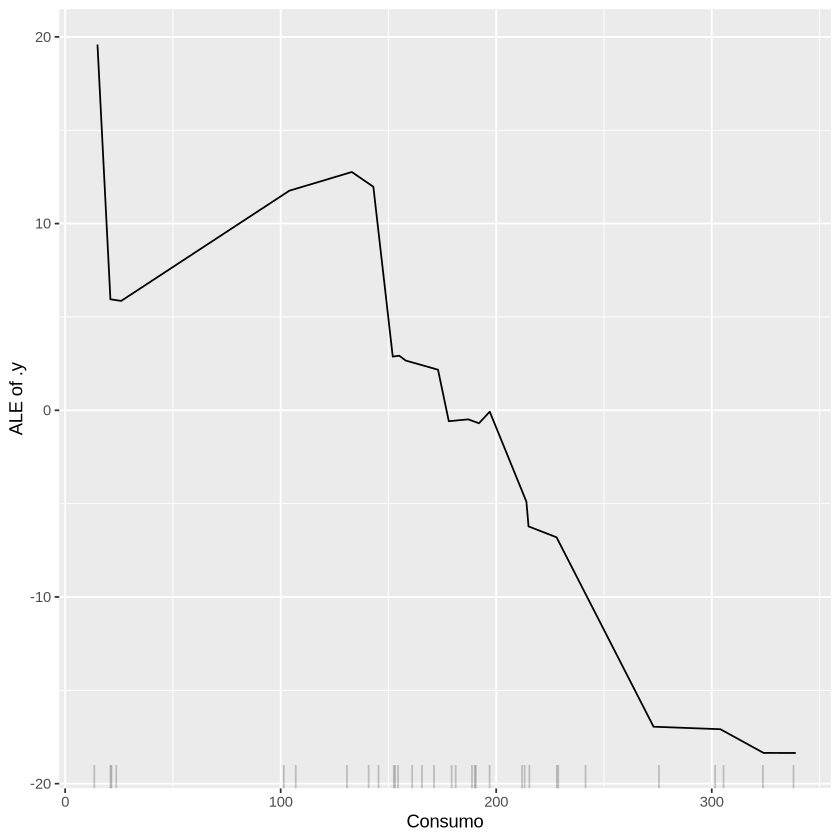

In [7]:
ALE$set.feature("Consumo")

ALE$plot()


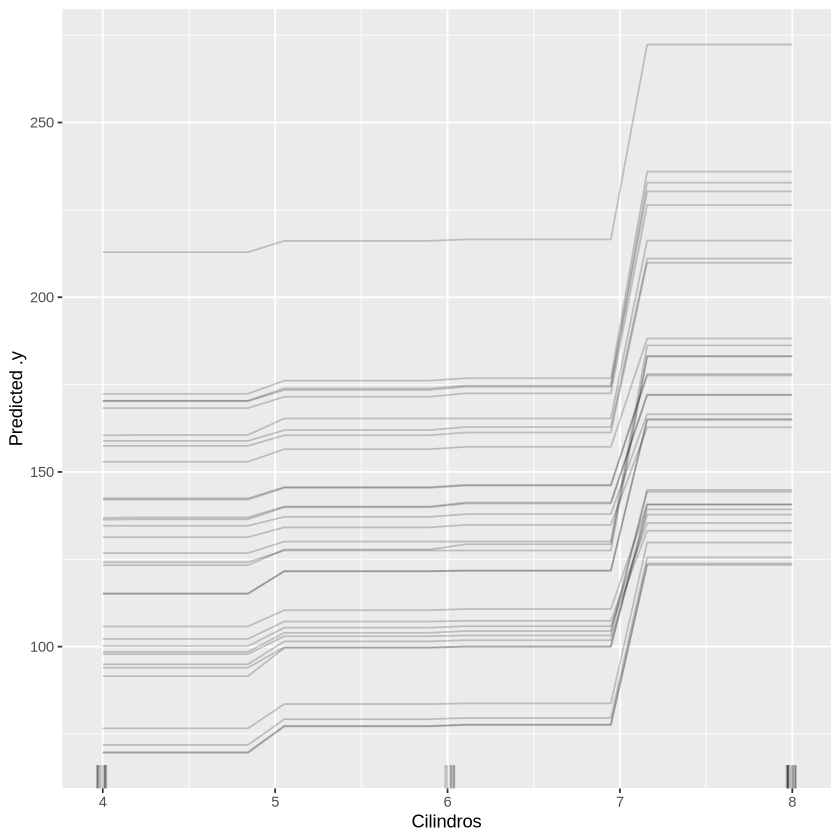

In [8]:
# Individual Conditional Expectation
ICE <- FeatureEffect$new(previsor, feature = "Cilindros", method = "ice")

ICE$plot()


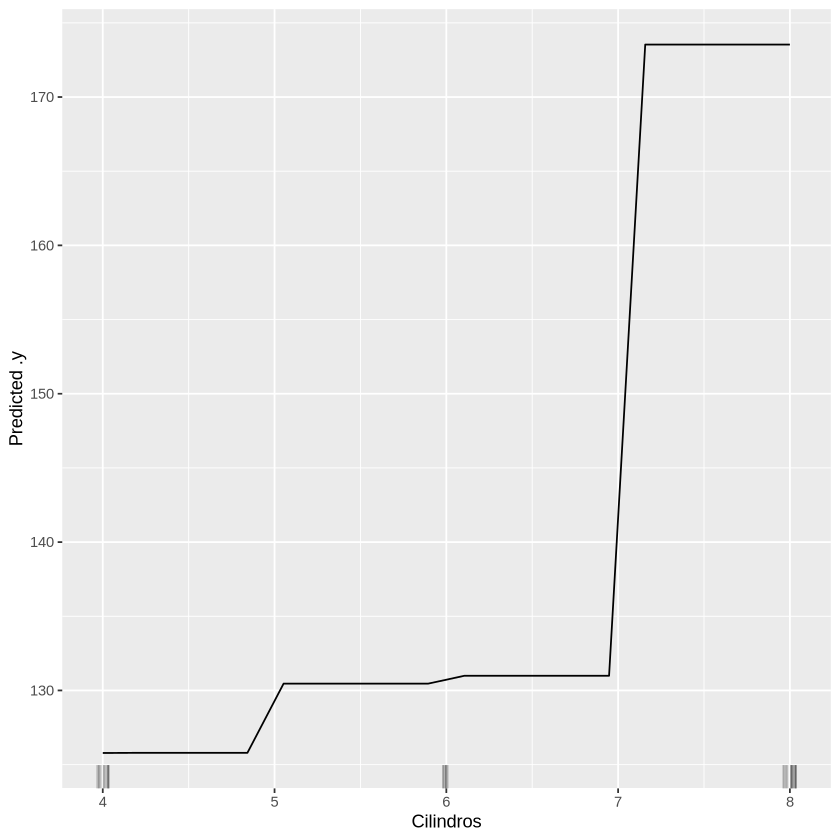

In [9]:
# Partial Dependence Plot
PDP <- FeatureEffect$new(previsor, feature = "Cilindros", method = "pdp")

PDP$plot()


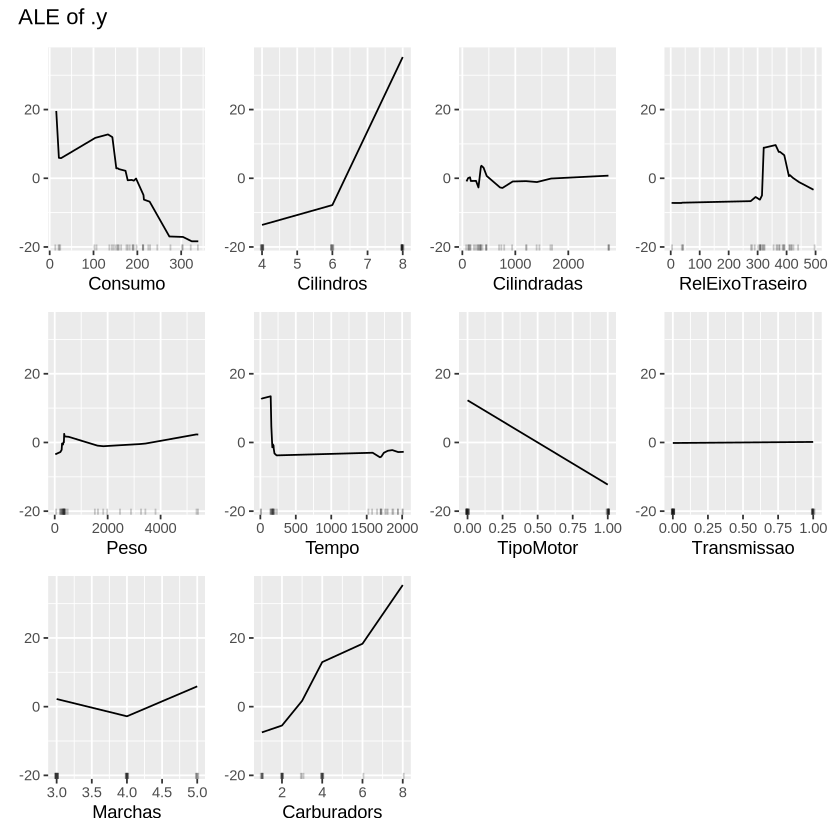

In [10]:
ALE <- FeatureEffects$new(previsor, method = "ale")

plot(ALE)


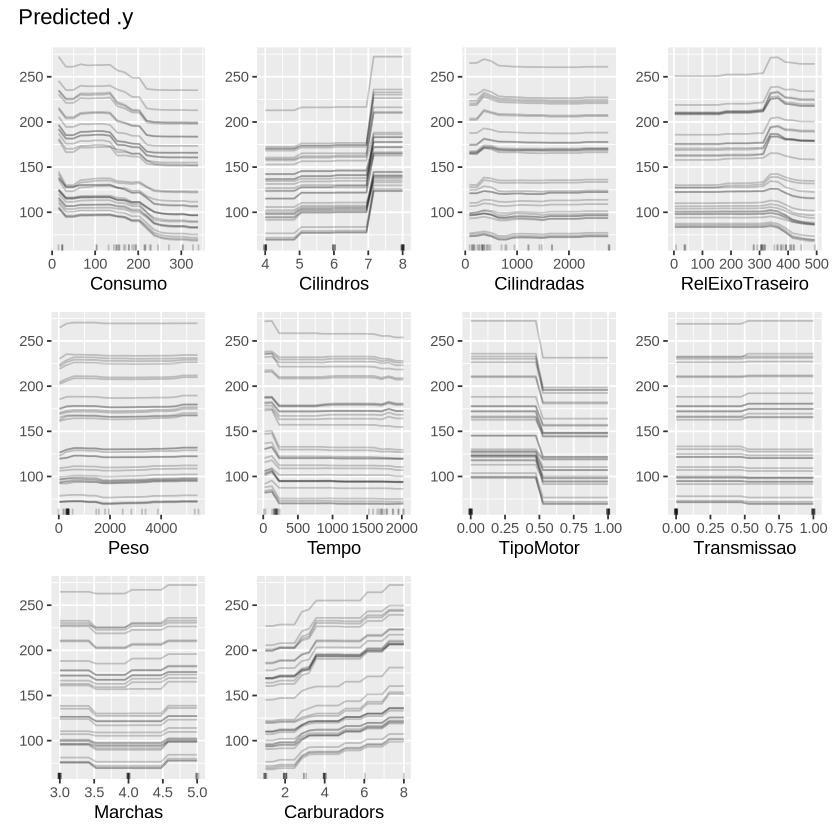

In [11]:
ICE <- FeatureEffects$new(previsor, method = "ice")

plot(ICE)


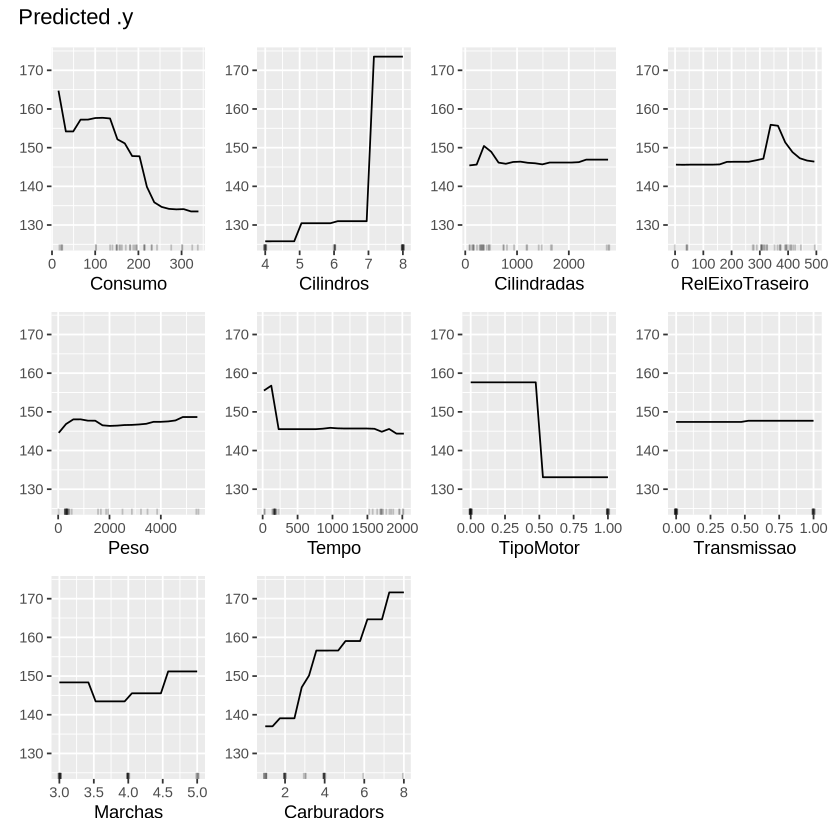

In [12]:
PDP <- FeatureEffects$new(previsor, method = "pdp")

plot(PDP)


In [13]:
# Interaction between features
interacao <- Interaction$new(previsor)

interacao$results


.feature,.interaction
<chr>,<dbl>
Consumo,0.07327534
Cilindros,0.09543420
Cilindradas,0.03985502
RelEixoTraseiro,0.08279016
Peso,0.02091640
Tempo,0.03219338
TipoMotor,0.05978819
Transmissao,0.01689164
Marchas,0.02330708


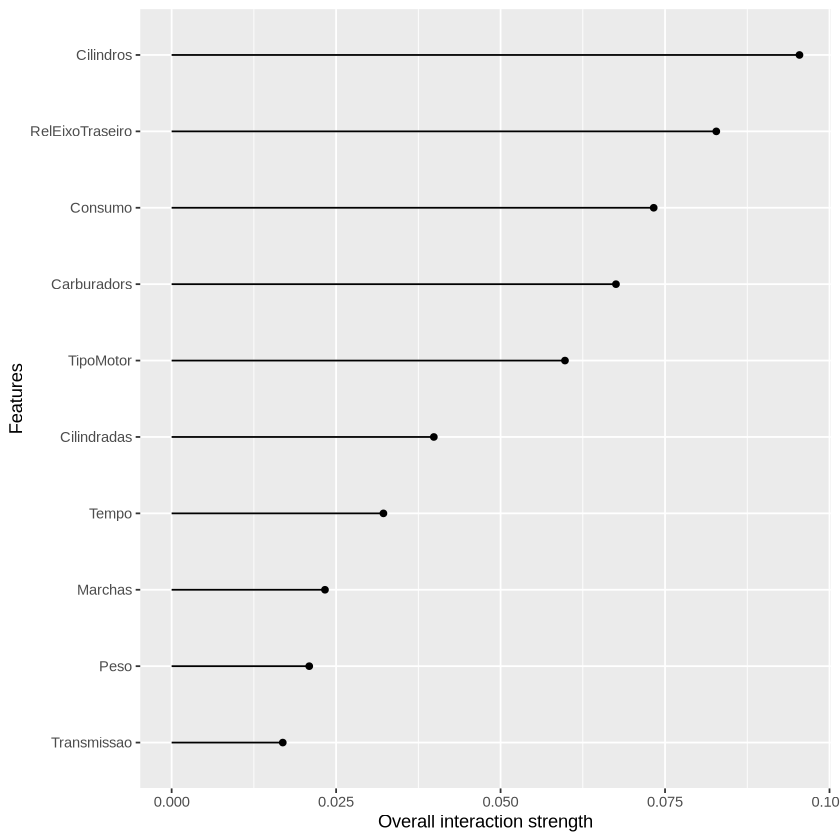

In [14]:
plot(interacao)


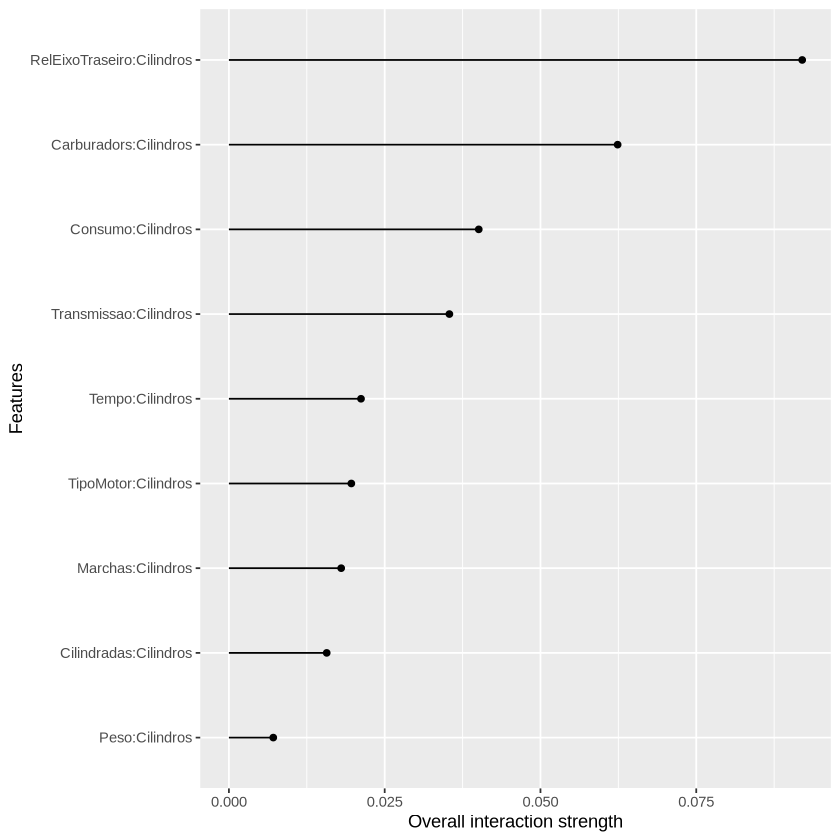

In [16]:
interacaoCilindros <- Interaction$new(previsor, feature = "Cilindros")

plot(interacaoCilindros)


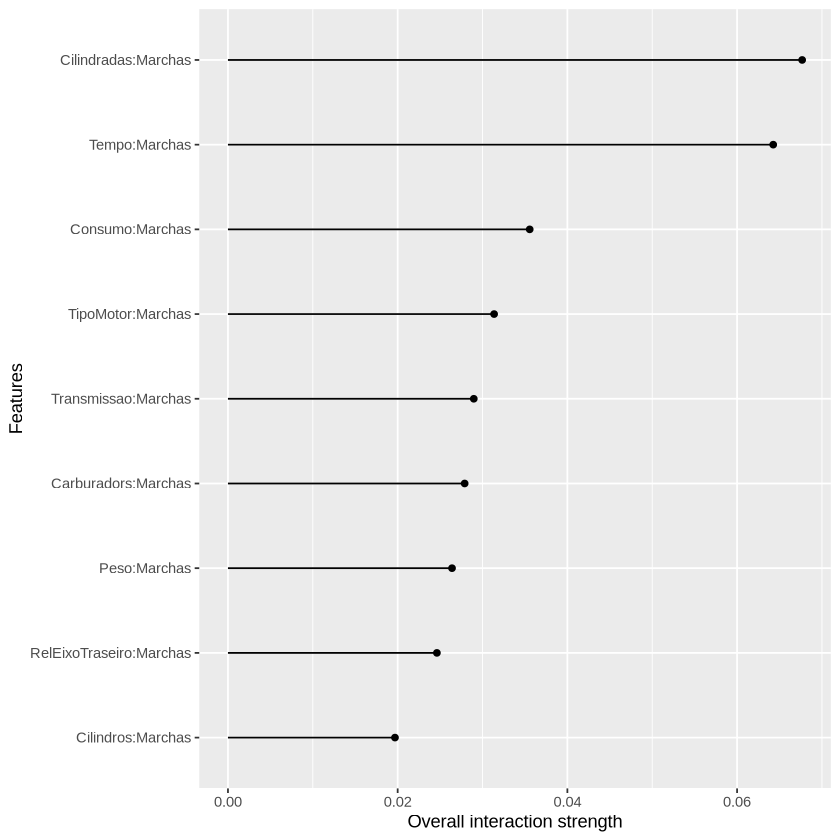

In [17]:
interecaoMarchas <- Interaction$new(previsor, feature = "Marchas")

plot(interecaoMarchas)
